In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization

In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
data = 'E:/MTECH_assignments/ML/P23CS005_Assignment_8/weatherAUS.csv'

df = pd.read_csv(data)

In [4]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
df = df.dropna()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56420 entries, 6049 to 142302
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           56420 non-null  object 
 1   Location       56420 non-null  object 
 2   MinTemp        56420 non-null  float64
 3   MaxTemp        56420 non-null  float64
 4   Rainfall       56420 non-null  float64
 5   Evaporation    56420 non-null  float64
 6   Sunshine       56420 non-null  float64
 7   WindGustDir    56420 non-null  object 
 8   WindGustSpeed  56420 non-null  float64
 9   WindDir9am     56420 non-null  object 
 10  WindDir3pm     56420 non-null  object 
 11  WindSpeed9am   56420 non-null  float64
 12  WindSpeed3pm   56420 non-null  float64
 13  Humidity9am    56420 non-null  float64
 14  Humidity3pm    56420 non-null  float64
 15  Pressure9am    56420 non-null  float64
 16  Pressure3pm    56420 non-null  float64
 17  Cloud9am       56420 non-null  float64
 18  Cloud3p

In [7]:
df.shape

(56420, 23)

In [8]:
col_names = df.columns

col_names

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [9]:
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 7 categorical variables

The categorical variables are : ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [10]:
# view the categorical variables

df[categorical].head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
6049,2009-01-01,Cobar,SSW,ENE,SW,No,No
6050,2009-01-02,Cobar,S,SSE,SSE,No,No
6052,2009-01-04,Cobar,NNE,NNE,NNW,No,No
6053,2009-01-05,Cobar,WNW,WNW,WSW,No,No
6054,2009-01-06,Cobar,WNW,NW,WNW,No,No


In [11]:
df[categorical].isnull().sum()

Date            0
Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

In [12]:
cat1 = [var for var in categorical if df[var].isnull().sum()!=0]

print(df[cat1].isnull().sum())

Series([], dtype: float64)


In [13]:
for var in categorical: 
    
    print(df[var].value_counts())

Date
2010-11-16    25
2009-03-09    25
2009-03-28    25
2009-03-26    25
2010-05-17    25
              ..
2008-03-26     1
2008-03-25     1
2008-03-24     1
2008-03-23     1
2008-01-02     1
Name: count, Length: 3416, dtype: int64
Location
Darwin              3062
Perth               3025
Brisbane            2953
MelbourneAirport    2929
PerthAirport        2913
SydneyAirport       2870
Watsonia            2730
Mildura             2594
MountGambier        2465
NorfolkIsland       2464
Cairns              2444
Townsville          2419
WaggaWagga          2416
AliceSprings        2223
Nuriootpa           2008
Hobart              1939
Moree               1913
Melbourne           1898
Portland            1863
Woomera             1734
Sydney              1690
Sale                1678
CoffsHarbour        1380
Williamtown         1198
Canberra            1078
Cobar                534
Name: count, dtype: int64
WindGustDir
E      4516
N      4210
W      4161
SW     4052
ENE    4028
SE     3930

In [14]:
for var in categorical: 
    
    print(df[var].value_counts()/np.double(len(df)))

Date
2010-11-16    0.000443
2009-03-09    0.000443
2009-03-28    0.000443
2009-03-26    0.000443
2010-05-17    0.000443
                ...   
2008-03-26    0.000018
2008-03-25    0.000018
2008-03-24    0.000018
2008-03-23    0.000018
2008-01-02    0.000018
Name: count, Length: 3416, dtype: float64
Location
Darwin              0.054272
Perth               0.053616
Brisbane            0.052340
MelbourneAirport    0.051914
PerthAirport        0.051631
SydneyAirport       0.050868
Watsonia            0.048387
Mildura             0.045977
MountGambier        0.043690
NorfolkIsland       0.043672
Cairns              0.043318
Townsville          0.042875
WaggaWagga          0.042822
AliceSprings        0.039401
Nuriootpa           0.035590
Hobart              0.034367
Moree               0.033906
Melbourne           0.033641
Portland            0.033020
Woomera             0.030734
Sydney              0.029954
Sale                0.029741
CoffsHarbour        0.024459
Williamtown         0.02

In [15]:
# check for cardinality in categorical variables

for var in categorical:
    
    print(var, ' contains ', len(df[var].unique()), ' labels')

Date  contains  3416  labels
Location  contains  26  labels
WindGustDir  contains  16  labels
WindDir9am  contains  16  labels
WindDir3pm  contains  16  labels
RainToday  contains  2  labels
RainTomorrow  contains  2  labels


In [16]:
df['Date'].dtypes

dtype('O')

In [17]:
# parse the dates, currently coded as strings, into datetime format

df['Date'] = pd.to_datetime(df['Date'])

In [18]:
df['Date'].dtypes

dtype('<M8[ns]')

In [19]:
df['Year'] = df['Date'].dt.year

df['Year'].head()

6049    2009
6050    2009
6052    2009
6053    2009
6054    2009
Name: Year, dtype: int32

In [20]:
# extract month from date

df['Month'] = df['Date'].dt.month

df['Month'].head()

6049    1
6050    1
6052    1
6053    1
6054    1
Name: Month, dtype: int32

In [21]:
# extract day from date

df['Day'] = df['Date'].dt.day

df['Day'].head()

6049    1
6050    2
6052    4
6053    5
6054    6
Name: Day, dtype: int32

In [22]:
# again view the summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56420 entries, 6049 to 142302
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           56420 non-null  datetime64[ns]
 1   Location       56420 non-null  object        
 2   MinTemp        56420 non-null  float64       
 3   MaxTemp        56420 non-null  float64       
 4   Rainfall       56420 non-null  float64       
 5   Evaporation    56420 non-null  float64       
 6   Sunshine       56420 non-null  float64       
 7   WindGustDir    56420 non-null  object        
 8   WindGustSpeed  56420 non-null  float64       
 9   WindDir9am     56420 non-null  object        
 10  WindDir3pm     56420 non-null  object        
 11  WindSpeed9am   56420 non-null  float64       
 12  WindSpeed3pm   56420 non-null  float64       
 13  Humidity9am    56420 non-null  float64       
 14  Humidity3pm    56420 non-null  float64       
 15  Pressure9am    56420

In [23]:
# drop the original Date variable

df.drop('Date', axis=1, inplace = True)

In [24]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
6049,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,...,1004.4,2.0,5.0,26.6,33.4,No,No,2009,1,1
6050,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,...,1012.1,1.0,1.0,20.3,27.0,No,No,2009,1,2
6052,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,...,1009.2,1.0,6.0,28.7,34.9,No,No,2009,1,4
6053,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,...,1009.1,1.0,5.0,29.1,35.6,No,No,2009,1,5
6054,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,WNW,...,1007.4,1.0,6.0,33.6,37.6,No,No,2009,1,6


In [25]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 6 categorical variables

The categorical variables are : ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [26]:
df[categorical].isnull().sum()

Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

In [27]:
# print number of labels in Location variable

print('Location contains', len(df.Location.unique()), 'labels')

Location contains 26 labels


In [28]:
df.Location.unique()

array(['Cobar', 'CoffsHarbour', 'Moree', 'NorfolkIsland', 'Sydney',
       'SydneyAirport', 'WaggaWagga', 'Williamtown', 'Canberra', 'Sale',
       'MelbourneAirport', 'Melbourne', 'Mildura', 'Portland', 'Watsonia',
       'Brisbane', 'Cairns', 'Townsville', 'MountGambier', 'Nuriootpa',
       'Woomera', 'PerthAirport', 'Perth', 'Hobart', 'AliceSprings',
       'Darwin'], dtype=object)

In [29]:
df.Location.value_counts()

Location
Darwin              3062
Perth               3025
Brisbane            2953
MelbourneAirport    2929
PerthAirport        2913
SydneyAirport       2870
Watsonia            2730
Mildura             2594
MountGambier        2465
NorfolkIsland       2464
Cairns              2444
Townsville          2419
WaggaWagga          2416
AliceSprings        2223
Nuriootpa           2008
Hobart              1939
Moree               1913
Melbourne           1898
Portland            1863
Woomera             1734
Sydney              1690
Sale                1678
CoffsHarbour        1380
Williamtown         1198
Canberra            1078
Cobar                534
Name: count, dtype: int64

In [30]:
# let's do One Hot Encoding of Location variable
# get k-1 dummy variables after One Hot Encoding 
# preview the dataset with head() method

pd.get_dummies(df.Location, drop_first=True).head()

,Brisbane,Cairns,Canberra,Cobar,CoffsHarbour,Darwin,Hobart,Melbourne,MelbourneAirport,Mildura,...,PerthAirport,Portland,Sale,Sydney,SydneyAirport,Townsville,WaggaWagga,Watsonia,Williamtown,Woomera
6049,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6050,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6052,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6053,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6054,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [31]:
# check labels in WindGustDir variable

df['WindGustDir'].unique()

array(['SSW', 'S', 'NNE', 'WNW', 'N', 'SE', 'ENE', 'NE', 'E', 'SW', 'W',
       'WSW', 'NNW', 'ESE', 'SSE', 'NW'], dtype=object)

In [32]:
df.WindGustDir.value_counts()

WindGustDir
E      4516
N      4210
W      4161
SW     4052
ENE    4028
SE     3930
SSW    3898
WSW    3791
S      3636
ESE    3312
SSE    3295
NE     3185
WNW    2989
NW     2612
NNE    2516
NNW    2289
Name: count, dtype: int64

In [33]:
# let's do One Hot Encoding of WindGustDir variable
# get k-1 dummy variables after One Hot Encoding 
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

pd.get_dummies(df.WindGustDir, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
6049,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
6050,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
6052,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
6053,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
6054,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False


In [34]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category

pd.get_dummies(df.WindGustDir, drop_first=True, dummy_na=True).sum(axis=0)

ENE    4028
ESE    3312
N      4210
NE     3185
NNE    2516
NNW    2289
NW     2612
S      3636
SE     3930
SSE    3295
SSW    3898
SW     4052
W      4161
WNW    2989
WSW    3791
NaN       0
dtype: int64

In [35]:
# print number of labels in WindDir9am variable

print('WindDir9am contains', len(df['WindDir9am'].unique()), 'labels')

WindDir9am contains 16 labels


In [36]:
# check labels in WindDir9am variable

df['WindDir9am'].unique()

array(['ENE', 'SSE', 'NNE', 'WNW', 'NW', 'N', 'S', 'SE', 'NE', 'W', 'SSW',
       'E', 'NNW', 'ESE', 'WSW', 'SW'], dtype=object)

In [37]:
# check frequency distribution of values in WindDir9am variable

df['WindDir9am'].value_counts()

WindDir9am
N      4967
E      4456
ENE    3932
SSE    3893
SE     3880
W      3707
S      3421
ESE    3400
NE     3390
SW     3356
NNE    3267
WSW    3037
NNW    3016
SSW    2926
WNW    2918
NW     2854
Name: count, dtype: int64

In [38]:
# let's do One Hot Encoding of WindDir9am variable
# get k-1 dummy variables after One Hot Encoding 
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

pd.get_dummies(df.WindDir9am, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
6049,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6050,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
6052,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
6053,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
6054,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


In [39]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category

pd.get_dummies(df.WindDir9am, drop_first=True, dummy_na=True).sum(axis=0)

ENE    3932
ESE    3400
N      4967
NE     3390
NNE    3267
NNW    3016
NW     2854
S      3421
SE     3880
SSE    3893
SSW    2926
SW     3356
W      3707
WNW    2918
WSW    3037
NaN       0
dtype: int64

In [40]:
# print number of labels in WindDir3pm variable

print('WindDir3pm contains', len(df['WindDir3pm'].unique()), 'labels')

WindDir3pm contains 16 labels


In [41]:
# check labels in WindDir3pm variable

df['WindDir3pm'].unique()

array(['SW', 'SSE', 'NNW', 'WSW', 'WNW', 'S', 'ENE', 'N', 'SE', 'NNE',
       'NW', 'E', 'ESE', 'NE', 'SSW', 'W'], dtype=object)

In [42]:
# check frequency distribution of values in WindDir3pm variable

df['WindDir3pm'].value_counts()

WindDir3pm
SE     4153
S      4109
SW     4012
ENE    3946
W      3922
WSW    3856
E      3753
ESE    3703
N      3626
SSW    3485
NE     3390
SSE    3332
WNW    3200
NNW    2766
NW     2727
NNE    2440
Name: count, dtype: int64

In [43]:
# let's do One Hot Encoding of WindDir3pm variable
# get k-1 dummy variables after One Hot Encoding 
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

pd.get_dummies(df.WindDir3pm, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
6049,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
6050,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
6052,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
6053,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
6054,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False


In [44]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category

pd.get_dummies(df.WindDir3pm, drop_first=True, dummy_na=True).sum(axis=0)

ENE    3946
ESE    3703
N      3626
NE     3390
NNE    2440
NNW    2766
NW     2727
S      4109
SE     4153
SSE    3332
SSW    3485
SW     4012
W      3922
WNW    3200
WSW    3856
NaN       0
dtype: int64

In [45]:
# print number of labels in RainToday variable

print('RainToday contains', len(df['RainToday'].unique()), 'labels')

RainToday contains 2 labels


In [46]:
# check labels in WindGustDir variable

df['RainToday'].unique()

array(['No', 'Yes'], dtype=object)

In [47]:
# check frequency distribution of values in WindGustDir variable

df.RainToday.value_counts()

RainToday
No     43958
Yes    12462
Name: count, dtype: int64

In [48]:
# let's do One Hot Encoding of RainToday variable
# get k-1 dummy variables after One Hot Encoding 
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

pd.get_dummies(df.RainToday, drop_first=True, dummy_na=True).head()

,Yes,NaN
6049,False,False
6050,False,False
6052,False,False
6053,False,False
6054,False,False


In [49]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category

pd.get_dummies(df.RainToday, drop_first=True, dummy_na=True).sum(axis=0)

Yes    12462
NaN        0
dtype: int64

In [50]:
# find numerical variables

numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 19 numerical variables

The numerical variables are : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day']


In [51]:
# view the numerical variables

df[numerical].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
6049,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,2009,1,1
6050,18.4,28.9,0.0,14.8,13.0,37.0,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,2009,1,2
6052,19.4,37.6,0.0,10.8,10.6,46.0,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,2009,1,4
6053,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,2009,1,5
6054,24.2,41.0,0.0,11.2,8.4,35.0,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,2009,1,6


In [52]:
# check missing values in numerical variables

df[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

In [53]:
# view summary statistics in numerical variables

print(round(df[numerical].describe()),2)

       MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count  56420.0  56420.0   56420.0      56420.0   56420.0        56420.0   
mean      13.0     24.0       2.0          6.0       8.0           41.0   
std        6.0      7.0       7.0          4.0       4.0           13.0   
min       -7.0      4.0       0.0          0.0       0.0            9.0   
25%        9.0     19.0       0.0          3.0       5.0           31.0   
50%       13.0     24.0       0.0          5.0       9.0           39.0   
75%       18.0     30.0       1.0          7.0      11.0           48.0   
max       31.0     48.0     206.0         81.0      14.0          124.0   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count       56420.0       56420.0      56420.0      56420.0      56420.0   
mean           16.0          20.0         66.0         50.0       1017.0   
std             8.0           9.0         19.0         20.0          7.0   
min             2.0 

Text(0, 0.5, 'WindSpeed3pm')

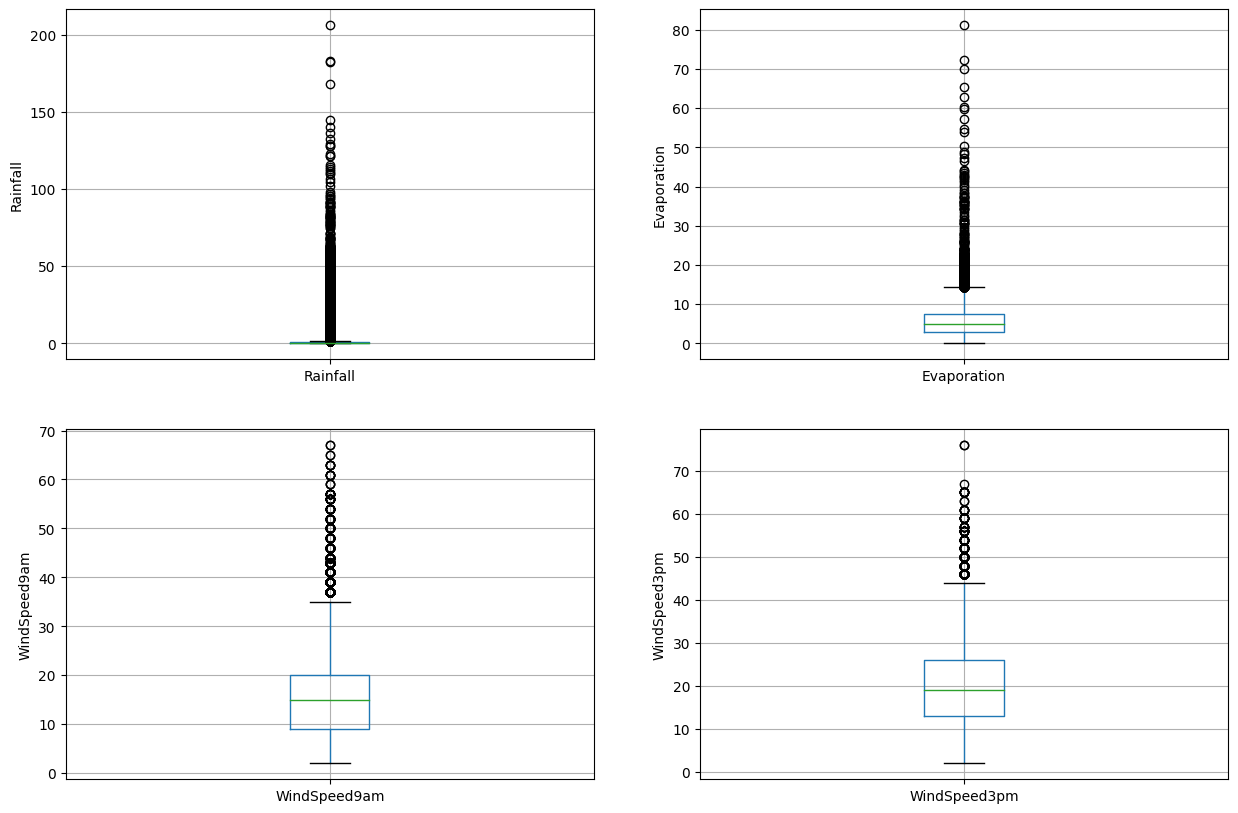

In [54]:
# draw boxplots to visualize outliers

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

Text(0, 0.5, 'RainTomorrow')

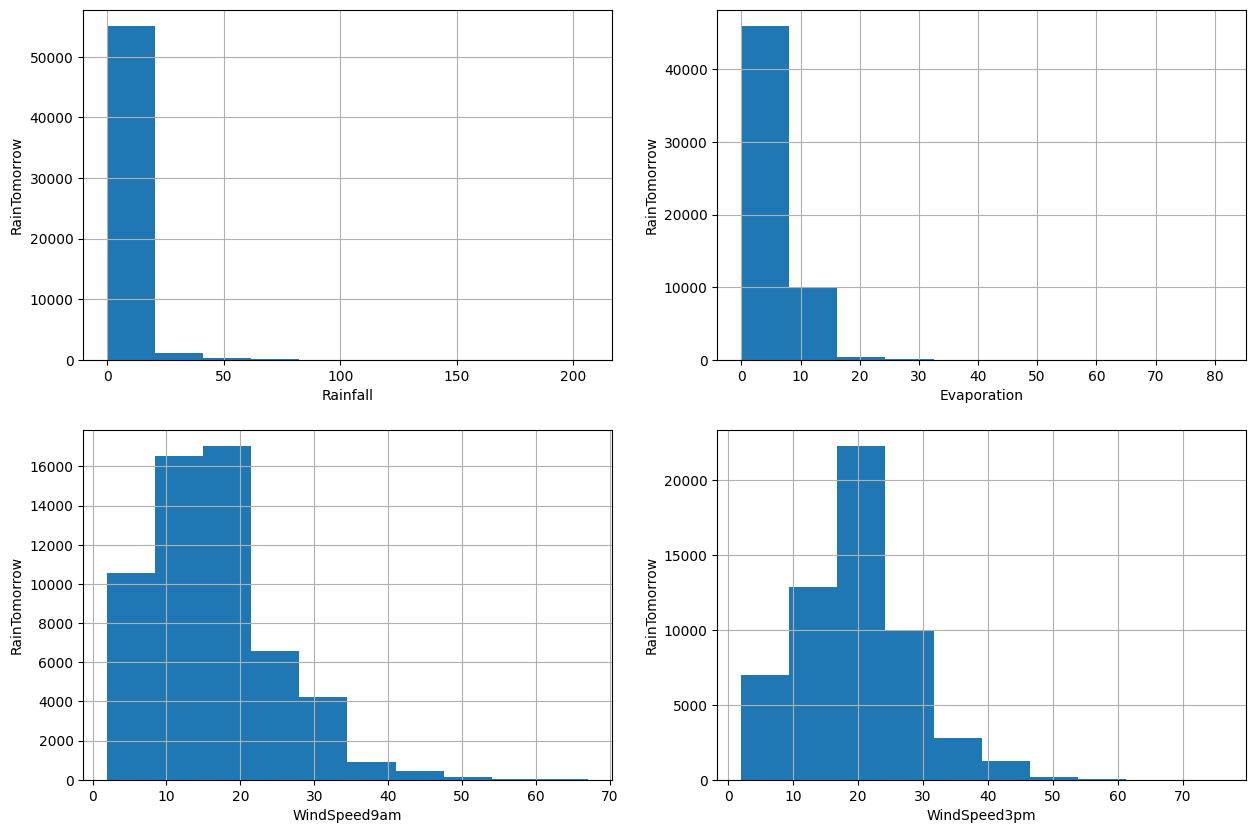

In [55]:
# plot histogram to check distribution

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.Rainfall.hist(bins=10)
fig.set_xlabel('Rainfall')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 2)
fig = df.Evaporation.hist(bins=10)
fig.set_xlabel('Evaporation')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 3)
fig = df.WindSpeed9am.hist(bins=10)
fig.set_xlabel('WindSpeed9am')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 4)
fig = df.WindSpeed3pm.hist(bins=10)
fig.set_xlabel('WindSpeed3pm')
fig.set_ylabel('RainTomorrow')

In [56]:
# find outliers for Rainfall variable

IQR = df.Rainfall.quantile(0.75) - df.Rainfall.quantile(0.25)
Lower_fence = df.Rainfall.quantile(0.25) - (IQR * 3)
Upper_fence = df.Rainfall.quantile(0.75) + (IQR * 3)
print('Rainfall outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Rainfall outliers are values < -1.7999999999999998 or > 2.4


In [57]:
# find outliers for Evaporation variable

IQR = df.Evaporation.quantile(0.75) - df.Evaporation.quantile(0.25)
Lower_fence = df.Evaporation.quantile(0.25) - (IQR * 3)
Upper_fence = df.Evaporation.quantile(0.75) + (IQR * 3)
print('Evaporation outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Evaporation outliers are values < -11.0 or > 21.200000000000003


In [58]:
# find outliers for WindSpeed9am variable

IQR = df.WindSpeed9am.quantile(0.75) - df.WindSpeed9am.quantile(0.25)
Lower_fence = df.WindSpeed9am.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed9am.quantile(0.75) + (IQR * 3)
print('WindSpeed9am outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

WindSpeed9am outliers are values < -24.0 or > 53.0


In [59]:
# find outliers for WindSpeed3pm variable

IQR = df.WindSpeed3pm.quantile(0.75) - df.WindSpeed3pm.quantile(0.25)
Lower_fence = df.WindSpeed3pm.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed3pm.quantile(0.75) + (IQR * 3)
print('WindSpeed3pm outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

WindSpeed3pm outliers are values < -26.0 or > 65.0


In [60]:
X = df.drop(['RainTomorrow'], axis=1)

y = df['RainTomorrow']

In [61]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [62]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((45136, 24), (11284, 24))

In [63]:
# check data types in X_train

X_train.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
Year               int32
Month              int32
Day                int32
dtype: object

In [64]:
# display categorical variables

categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [65]:
# display numerical variables

numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Year',
 'Month',
 'Day']

In [66]:
# check missing values in numerical variables in X_train

X_train[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

In [67]:
# check missing values in numerical variables in X_test

X_test[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

In [68]:
# print percentage of missing values in the numerical variables in training set

for col in numerical:
    if X_train[col].isnull().mean()>0:
        print(col, round(X_train[col].isnull().mean(),4))

In [69]:
# impute missing values in X_train and X_test with respective column median in X_train

for df1 in [X_train, X_test]:
    for col in numerical:
        col_median=X_train[col].median()
        df1[col].fillna(col_median, inplace=True)           

In [70]:
# check again missing values in numerical variables in X_train

X_train[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

In [71]:
# check missing values in numerical variables in X_test

X_test[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

In [72]:
# print percentage of missing values in the categorical variables in training set

X_train[categorical].isnull().mean()

Location       0.0
WindGustDir    0.0
WindDir9am     0.0
WindDir3pm     0.0
RainToday      0.0
dtype: float64

In [73]:
# print categorical variables with missing data

for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(col, (X_train[col].isnull().mean()))

In [74]:
# impute missing categorical variables with most frequent value

for df2 in [X_train, X_test]:
    df2['WindGustDir'].fillna(X_train['WindGustDir'].mode()[0], inplace=True)
    df2['WindDir9am'].fillna(X_train['WindDir9am'].mode()[0], inplace=True)
    df2['WindDir3pm'].fillna(X_train['WindDir3pm'].mode()[0], inplace=True)
    df2['RainToday'].fillna(X_train['RainToday'].mode()[0], inplace=True)

In [75]:
# check missing values in categorical variables in X_train

X_train[categorical].isnull().sum()


Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [76]:
# check missing values in categorical variables in X_test

X_test[categorical].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [77]:
# check missing values in X_train

X_train.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
Year             0
Month            0
Day              0
dtype: int64

In [78]:
# check missing values in X_test

X_test.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
Year             0
Month            0
Day              0
dtype: int64

In [79]:
def max_value(df3, variable, top):
    return np.where(df3[variable]>top, top, df3[variable])

for df3 in [X_train, X_test]:
    df3['Rainfall'] = max_value(df3, 'Rainfall', 3.2)
    df3['Evaporation'] = max_value(df3, 'Evaporation', 21.8)
    df3['WindSpeed9am'] = max_value(df3, 'WindSpeed9am', 55)
    df3['WindSpeed3pm'] = max_value(df3, 'WindSpeed3pm', 57)

In [80]:
X_train.Rainfall.max(), X_test.Rainfall.max()

(3.2, 3.2)

In [81]:
X_train.Evaporation.max(), X_test.Evaporation.max()

(21.8, 21.8)

In [82]:
X_train.WindSpeed9am.max(), X_test.WindSpeed9am.max()

(55.0, 55.0)

In [83]:
X_train.WindSpeed3pm.max(), X_test.WindSpeed3pm.max()

(57.0, 57.0)

In [84]:
X_train[numerical].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
count,45136.000000,45136.000000,45136.000000,45136.000000,45136.000000,45136.000000,45136.000000,45136.000000,45136.000000,45136.000000,45136.000000,45136.000000,45136.000000,45136.000000,45136.000000,45136.000000,45136.000000,45136.000000,45136.000000
mean,13.460666,24.207005,0.671830,5.469242,7.729458,40.886255,15.679170,19.800315,65.894364,49.626817,1017.255780,1014.810008,4.238191,4.320188,18.198755,22.699118,2012.222948,6.420042,15.754475
std,6.411206,6.976391,1.179652,3.508103,3.756245,13.359252,8.303351,8.508927,18.529637,20.192611,6.907346,6.871586,2.799524,2.648562,6.572731,6.840171,2.449089,3.444068,8.774371
min,-6.700000,4.100000,0.000000,0.000000,0.000000,9.000000,2.000000,2.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-0.700000,3.700000,2007.000000,1.000000,1.000000
25%,8.600000,18.700000,0.000000,2.800000,5.000000,31.000000,9.000000,13.000000,55.000000,36.000000,1012.700000,1010.100000,1.000000,2.000000,13.100000,17.300000,2010.000000,3.000000,8.000000
50%,13.200000,23.900000,0.000000,5.000000,8.600000,39.000000,15.000000,19.000000,67.000000,50.000000,1017.200000,1014.700000,5.000000,5.000000,17.800000,22.400000,2012.000000,6.000000,16.000000
75%,18.400000,29.700000,0.600000,7.400000,10.700000,48.000000,20.000000,26.000000,79.000000,63.000000,1021.800000,1019.400000,7.000000,7.000000,23.300000,27.900000,2014.000000,9.000000,23.000000
max,30.500000,47.300000,3.200000,21.800000,14.500000,124.000000,55.000000,57.000000,100.000000,100.000000,1040.400000,1038.900000,8.000000,8.000000,39.400000,46.100000,2017.000000,12.000000,31.000000


In [85]:
categorical

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [86]:
X_train[categorical].head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
40249,Williamtown,SSW,S,SSE,No
23214,NorfolkIsland,ENE,E,E,No
106053,Woomera,S,ENE,WSW,No
36089,SydneyAirport,SSW,SE,S,Yes
22756,NorfolkIsland,SSE,ESE,SE,No


In [87]:
# encode RainToday variable

import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['RainToday'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [88]:
X_train.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_0,RainToday_1,Year,Month,Day
40249,Williamtown,17.5,26.2,0.0,12.0,13.0,SSW,39.0,S,SSE,...,1012.5,2.0,1.0,23.4,24.5,0,1,2010,12,13
23214,NorfolkIsland,20.6,25.2,0.0,6.0,11.2,ENE,50.0,E,E,...,1015.9,5.0,6.0,23.4,23.8,0,1,2014,12,25
106053,Woomera,9.4,22.0,0.0,3.2,10.6,S,28.0,ENE,WSW,...,1022.5,1.0,1.0,15.9,21.7,0,1,2010,5,7
36089,SydneyAirport,17.8,21.5,3.2,5.6,5.7,SSW,41.0,SE,S,...,1021.8,7.0,5.0,20.0,20.1,1,0,2016,4,12
22756,NorfolkIsland,14.7,18.7,0.0,4.2,0.0,SSE,50.0,ESE,SE,...,1011.5,7.0,8.0,17.8,17.1,0,1,2013,9,23


In [89]:
X_train = pd.concat([X_train[numerical], X_train[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_train.Location), 
                     pd.get_dummies(X_train.WindGustDir),
                     pd.get_dummies(X_train.WindDir9am),
                     pd.get_dummies(X_train.WindDir3pm)], axis=1)

In [90]:
X_train.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
40249,17.5,26.2,0.0,12.0,13.0,39.0,30.0,28.0,65.0,61.0,...,False,False,False,False,True,False,False,False,False,False
23214,20.6,25.2,0.0,6.0,11.2,50.0,26.0,33.0,76.0,72.0,...,False,False,False,False,False,False,False,False,False,False
106053,9.4,22.0,0.0,3.2,10.6,28.0,4.0,7.0,55.0,36.0,...,False,False,False,False,False,False,False,False,False,True
36089,17.8,21.5,3.2,5.6,5.7,41.0,19.0,28.0,72.0,71.0,...,False,False,True,False,False,False,False,False,False,False
22756,14.7,18.7,0.0,4.2,0.0,50.0,22.0,24.0,77.0,76.0,...,False,False,False,True,False,False,False,False,False,False


In [91]:
X_test = pd.concat([X_test[numerical], X_test[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_test.Location), 
                     pd.get_dummies(X_test.WindGustDir),
                     pd.get_dummies(X_test.WindDir9am),
                     pd.get_dummies(X_test.WindDir3pm)], axis=1)

In [92]:
X_test.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
103197,0.6,16.0,0.0,5.8,10.0,35.0,19.0,20.0,55.0,41.0,...,False,False,False,False,False,False,False,False,False,True
33303,19.7,28.4,0.0,7.4,6.0,35.0,11.0,17.0,67.0,64.0,...,False,False,False,False,False,False,False,False,False,False
136838,23.3,38.5,3.2,10.4,10.0,57.0,24.0,9.0,46.0,27.0,...,False,False,False,True,False,False,False,False,False,False
80964,10.8,19.7,0.0,5.2,4.8,35.0,11.0,13.0,72.0,56.0,...,False,False,False,False,False,False,False,False,False,False
34347,8.9,21.8,0.0,1.6,10.1,37.0,13.0,7.0,61.0,30.0,...,True,False,False,False,False,False,False,False,False,False


In [93]:
X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day,RainToday_0,RainToday_1
count,45136.000000,45136.000000,45136.000000,45136.000000,45136.000000,45136.000000,45136.000000,45136.000000,45136.000000,45136.000000,...,45136.000000,45136.000000,45136.000000,45136.000000,45136.000000,45136.000000,45136.000000,45136.000000,45136.000000,45136.000000
mean,13.460666,24.207005,0.671830,5.469242,7.729458,40.886255,15.679170,19.800315,65.894364,49.626817,...,1014.810008,4.238191,4.320188,18.198755,22.699118,2012.222948,6.420042,15.754475,0.220024,0.779976
std,6.411206,6.976391,1.179652,3.508103,3.756245,13.359252,8.303351,8.508927,18.529637,20.192611,...,6.871586,2.799524,2.648562,6.572731,6.840171,2.449089,3.444068,8.774371,0.414267,0.414267
min,-6.700000,4.100000,0.000000,0.000000,0.000000,9.000000,2.000000,2.000000,0.000000,0.000000,...,977.100000,0.000000,0.000000,-0.700000,3.700000,2007.000000,1.000000,1.000000,0.000000,0.000000
25%,8.600000,18.700000,0.000000,2.800000,5.000000,31.000000,9.000000,13.000000,55.000000,36.000000,...,1010.100000,1.000000,2.000000,13.100000,17.300000,2010.000000,3.000000,8.000000,0.000000,1.000000
50%,13.200000,23.900000,0.000000,5.000000,8.600000,39.000000,15.000000,19.000000,67.000000,50.000000,...,1014.700000,5.000000,5.000000,17.800000,22.400000,2012.000000,6.000000,16.000000,0.000000,1.000000
75%,18.400000,29.700000,0.600000,7.400000,10.700000,48.000000,20.000000,26.000000,79.000000,63.000000,...,1019.400000,7.000000,7.000000,23.300000,27.900000,2014.000000,9.000000,23.000000,0.000000,1.000000
max,30.500000,47.300000,3.200000,21.800000,14.500000,124.000000,55.000000,57.000000,100.000000,100.000000,...,1038.900000,8.000000,8.000000,39.400000,46.100000,2017.000000,12.000000,31.000000,1.000000,1.000000


In [94]:
cols = X_train.columns

In [95]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [96]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [97]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [98]:
X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
count,45136.000000,45136.000000,45136.000000,45136.000000,45136.000000,45136.000000,45136.000000,45136.000000,45136.000000,45136.000000,...,45136.000000,45136.000000,45136.000000,45136.000000,45136.00000,45136.000000,45136.000000,45136.000000,45136.000000,45136.000000
mean,0.541953,0.465440,0.209947,0.250883,0.533066,0.277272,0.258098,0.323642,0.658944,0.496268,...,0.048875,0.047567,0.072581,0.074708,0.05849,0.060971,0.071008,0.070498,0.056673,0.068748
std,0.172344,0.161491,0.368641,0.160922,0.259051,0.116167,0.156667,0.154708,0.185296,0.201926,...,0.215608,0.212851,0.259450,0.262922,0.23467,0.239280,0.256840,0.255987,0.231220,0.253028
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.411290,0.337963,0.000000,0.128440,0.344828,0.191304,0.132075,0.200000,0.550000,0.360000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.534946,0.458333,0.000000,0.229358,0.593103,0.260870,0.245283,0.309091,0.670000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.674731,0.592593,0.187500,0.339450,0.737931,0.339130,0.339623,0.436364,0.790000,0.630000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [99]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [100]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [101]:
# probability of getting output as 0 - no rain

logreg.predict_proba(X_test)[:,0]

array([0.98963125, 0.72433847, 0.5915083 , ..., 0.9808218 , 0.81433696,
       0.65234402])

In [102]:
# probability of getting output as 1 - rain

logreg.predict_proba(X_test)[:,1]

array([0.01036875, 0.27566153, 0.4084917 , ..., 0.0191782 , 0.18566304,
       0.34765598])

In [103]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.8610


In [104]:
y_pred_train = logreg.predict(X_train)

y_pred_train

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [105]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8565


In [106]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.8565
Test set score: 0.8610


In [107]:
# fit the Logsitic Regression model with C=100

# instantiate the model
logreg100 = LogisticRegression(C=100, solver='liblinear', random_state=0)


# fit the model
logreg100.fit(X_train, y_train)

LogisticRegression(C=100, random_state=0, solver='liblinear')

In [108]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg100.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg100.score(X_test, y_test)))

Training set score: 0.8565
Test set score: 0.8622


In [109]:
# fit the Logsitic Regression model with C=001

# instantiate the model
logreg001 = LogisticRegression(C=0.01, solver='liblinear', random_state=0)


# fit the model
logreg001.fit(X_train, y_train)

LogisticRegression(C=0.01, random_state=0, solver='liblinear')

In [110]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg001.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg001.score(X_test, y_test)))

Training set score: 0.8459
Test set score: 0.8520


In [111]:
# check class distribution in test set

y_test.value_counts()

RainTomorrow
No     8854
Yes    2430
Name: count, dtype: int64

In [113]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[8335  519]
 [1050 1380]]

True Positives(TP) =  8335

True Negatives(TN) =  1380

False Positives(FP) =  519

False Negatives(FN) =  1050


<Axes: >

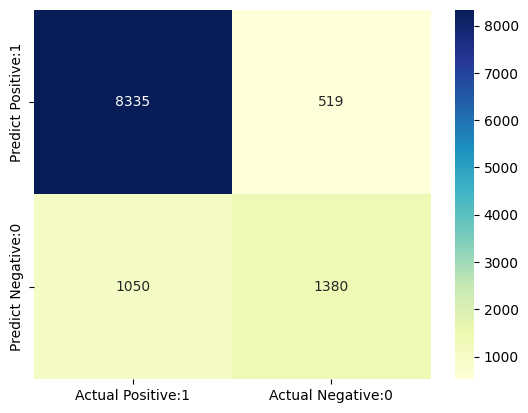

In [114]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [115]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

          No       0.89      0.94      0.91      8854
         Yes       0.73      0.57      0.64      2430

    accuracy                           0.86     11284
   macro avg       0.81      0.75      0.78     11284
weighted avg       0.85      0.86      0.85     11284



In [116]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [117]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8610


In [118]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1390


In [119]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9414


In [120]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.8881


In [121]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.8881


In [122]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.2733


In [123]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.7267


In [124]:
# print the first 10 predicted probabilities of two classes- 0 and 1

y_pred_prob = logreg.predict_proba(X_test)[0:10]

y_pred_prob

array([[0.98963125, 0.01036875],
       [0.72433847, 0.27566153],
       [0.5915083 , 0.4084917 ],
       [0.82125107, 0.17874893],
       [0.95108818, 0.04891182],
       [0.98018304, 0.01981696],
       [0.68275306, 0.31724694],
       [0.96789666, 0.03210334],
       [0.98651794, 0.01348206],
       [0.94742129, 0.05257871]])

In [125]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - No rain tomorrow (0)', 'Prob of - Rain tomorrow (1)'])

y_pred_prob_df

,Prob of - No rain tomorrow (0),Prob of - Rain tomorrow (1)
0,0.989631,0.010369
1,0.724338,0.275662
2,0.591508,0.408492
3,0.821251,0.178749
4,0.951088,0.048912
5,0.980183,0.019817
6,0.682753,0.317247
7,0.967897,0.032103
8,0.986518,0.013482
9,0.947421,0.052579


In [126]:
# print the first 10 predicted probabilities for class 1 - Probability of rain

logreg.predict_proba(X_test)[0:10, 1]

array([0.01036875, 0.27566153, 0.4084917 , 0.17874893, 0.04891182,
       0.01981696, 0.31724694, 0.03210334, 0.01348206, 0.05257871])

In [127]:
# store the predicted probabilities for class 1 - Probability of rain

y_pred1 = logreg.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

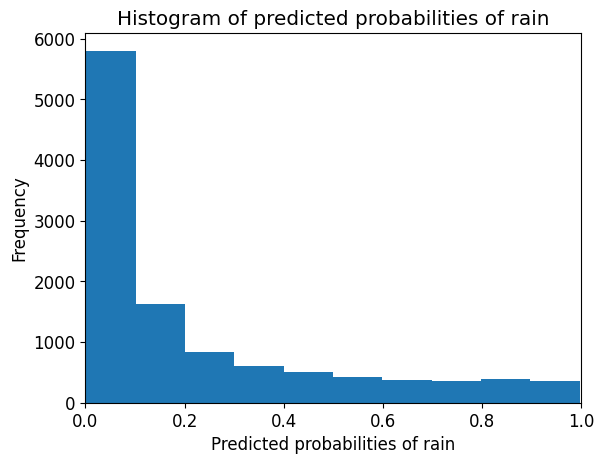

In [128]:
# plot histogram of predicted probabilities


# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of rain')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of rain')
plt.ylabel('Frequency')

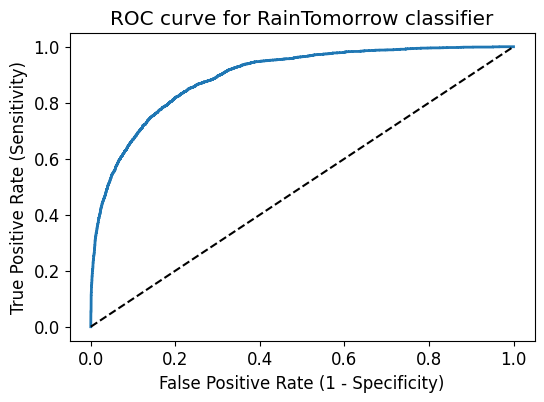

In [132]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label = 'Yes')

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for RainTomorrow classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [133]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8943


In [134]:
# calculate cross-validated ROC AUC 

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(logreg, X_train, y_train, cv=5, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.8878


In [135]:
# Applying 5-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, X_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.85389898 0.8569846  0.85454747 0.85554448 0.8538828 ]


In [136]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.8550


In [137]:
from sklearn.model_selection import GridSearchCV


parameters = [{'penalty':['l1','l2']}, 
              {'C':[1, 10, 100, 1000]}]



grid_search = GridSearchCV(estimator = logreg,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=0, solver='liblinear'),
             param_grid=[{'penalty': ['l1', 'l2']}, {'C': [1, 10, 100, 1000]}],
             scoring='accuracy')

In [138]:
# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.8557


Parameters that give the best results : 

 {'C': 1000}


Estimator that was chosen by the search : 

 LogisticRegression(C=1000, random_state=0, solver='liblinear')


In [139]:
# calculate GridSearch CV score on test set

print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV score on test set: 0.8623
